In [1]:
import datetime

class Task:
    def __init__(self, name, category, duration, stat, date=None):
        self.name = name
        self.category = category
        self.duration = duration
        self.stat = stat
        self.date = date if date else datetime.date.today()


class User:
    def __init__(self):
        self.tasks = []
        self.xp = 0
        self.level = 1
        self.streaks = {}
        self.stats = {'Body': 0, 'Mind': 0, 'Art': 0, 'Tech': 0, 'Home': 0, 'Spirit': 0}

    def add_task(self, task):
        self.tasks.append(task)
        self.calculate_xp(task)

    def calculate_xp(self, task):
        streak_bonus = 1
        if task.category in ['typing', 'piano']:
            if task.category not in self.streaks:
                self.streaks[task.category] = [task.date]
            else:
                last_date = self.streaks[task.category][-1]
                if (task.date - last_date).days == 1:
                    streak_len = len(self.streaks[task.category]) + 1
                    streak_bonus = min(streak_len, 3)
                    self.streaks[task.category].append(task.date)
                else:
                    self.streaks[task.category] = [task.date]
        else:
            if task.category not in self.streaks:
                self.streaks[task.category] = []
            self.streaks[task.category].append(task.date)

        xp_gained = task.duration * streak_bonus
        self.xp += xp_gained
        self.stats[task.stat] += xp_gained
        self.update_level()

    def update_level(self):
        self.level = self.xp // 600 + 1

    def display_xp(self):
        return self.xp

    def display_tasks(self):
        return [(task.name, task.category, task.duration, task.stat, task.date) for task in self.tasks]

    def display_stats(self):
        return self.stats


    def __repr__(self):
        max_stat_length = max(len(stat) for stat in self.stats.keys())
        stats1 = ""
        stats2 = ""
        for stat, value in self.stats.items():
            stat_name = stat.rjust(max_stat_length)
            stat_value = str(value).rjust(5)
            if stat in ['Body', 'Mind', 'Spirit']:
                stats1 += f"{stat_name}: {stat_value} | "
            else:
                stats2 += f"{stat_name}: {stat_value} | "

        xp_str = str(self.xp).rjust(5)
        level_str = str(self.level).rjust(2)

        return (
            "+-----------------------------------------------+\n"
            f"| Level: {level_str} |                       | XP: {xp_str} |\n"
            "+-----------------------------------------------+\n"
            f"| {stats1[:-3]} |\n"  # Remove the last " | "
            f"| {stats2[:-3]} |\n"  # Remove the last " | "
            "+-----------------------------------------------+"
        )






In [2]:

# Usage
user = User()

# Add a task for yesterday
yesterday = datetime.date.today() - datetime.timedelta(days=1)
task2 = Task("Practice piano", "piano", 30, "Art", yesterday)
user.add_task(task2)

# Add a task for today
task1 = Task("Practice piano", "piano", 30, "Art")
user.add_task(task1)

# Display total XP and stats
print(f"Total XP: {user.display_xp()}")
print(f"Task History: {user.display_tasks()}")
print(f"Stats: {user.display_stats()}")

Total XP: 90
Task History: [('Practice piano', 'piano', 30, 'Art', datetime.date(2024, 6, 16)), ('Practice piano', 'piano', 30, 'Art', datetime.date(2024, 6, 17))]
Stats: {'Body': 0, 'Mind': 0, 'Art': 90, 'Tech': 0, 'Home': 0, 'Spirit': 0}


In [3]:
user

+-----------------------------------------------+
| Level:  1 |                       | XP:    90 |
+-----------------------------------------------+
|   Body:     0 |   Mind:     0 | Spirit:     0 |
|    Art:    90 |   Tech:     0 |   Home:     0 |
+-----------------------------------------------+

In [4]:
# import tkinter as tk
# from tkinter import ttk
# import datetime

# def submit_task():
#     date = calendar_var.get()
#     description = description_entry.get()
#     category = category_var.get()
#     minutes = minutes_entry.get()
#     print(f"Date: {date}, Description: {description}, Category: {category}, Minutes: {minutes}")
#     # You can add your logic here to process the task entry

# # Create the main window
# root = tk.Tk()
# root.title("Task Entry")

# # Calendar Date Dropdown
# calendar_label = ttk.Label(root, text="Select Date:")
# calendar_label.grid(row=0, column=0, padx=10, pady=5)
# calendar_var = tk.StringVar()
# calendar_dropdown = ttk.Combobox(root, textvariable=calendar_var)
# calendar_dropdown['values'] = ('June 1, 2024', 'June 2, 2024', 'June 3, 2024')  # Example dates
# calendar_dropdown.grid(row=0, column=1, padx=10, pady=5)
# calendar_dropdown.current(0)

# # Description Text Box
# description_label = ttk.Label(root, text="Enter Description:")
# description_label.grid(row=1, column=0, padx=10, pady=5)
# description_entry = ttk.Entry(root, width=40)
# description_entry.grid(row=1, column=1, padx=10, pady=5)

# # Stat Category Dropdown
# category_label = ttk.Label(root, text="Select Category:")
# category_label.grid(row=2, column=0, padx=10, pady=5)
# category_var = tk.StringVar()
# category_dropdown = ttk.Combobox(root, textvariable=category_var)
# category_dropdown['values'] = ('Body', 'Mind', 'Art', 'Tech', 'Home', 'Spirit')  # Example categories
# category_dropdown.grid(row=2, column=1, padx=10, pady=5)
# category_dropdown.current(0)

# # Minutes Entry
# minutes_label = ttk.Label(root, text="Enter Minutes:")
# minutes_label.grid(row=3, column=0, padx=10, pady=5)
# minutes_entry = ttk.Entry(root)
# minutes_entry.grid(row=3, column=1, padx=10, pady=5)

# # Submit Button
# submit_button = ttk.Button(root, text="Submit", command=submit_task)
# submit_button.grid(row=4, column=0, columnspan=2, padx=10, pady=10)

# # Run the application
# root.mainloop()

In [1]:
!pip install tkcalendar
!pip install matplotlib


     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.5 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 60.9/60.9 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB 8.9 MB/s eta 0:00:01
   --- ------------------------------------ 0.6/8.0 MB 9.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.0 MB 8.5 MB/s eta 0:00:01
   ------ --------------------------------- 1.2/8.0 MB 7.9 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/8.0 MB 7.6 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.0 MB 7.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.2/8.0 MB 7.3 MB/s eta 0:00:01
   -----------

In [1]:
import tkinter as tk
from tkinter import ttk
from tkcalendar import DateEntry
import json
import datetime

class Task:
    def __init__(self, name, category, duration, stat, date=None):
        self.name = name
        self.category = category
        self.duration = duration
        self.stat = stat
        if isinstance(date, str):
            self.date = datetime.datetime.strptime(date, '%Y-%m-%d').date()
        else:
            self.date = date if date else datetime.date.today()

class User:
    def __init__(self):
        self.tasks = []
        self.xp = 0
        self.level = 1
        self.streaks = {}
        self.stats = {'Body': 0, 'Mind': 0, 'Art': 0, 'Tech': 0, 'Home': 0, 'Spirit': 0}

    def add_task(self, task):
        self.tasks.append(task)
        self.recalculate_xp_and_streaks()

    def update_task(self, index, task):
        self.tasks[index] = task
        self.recalculate_xp_and_streaks()

    def delete_task(self, index):
        del self.tasks[index]
        self.recalculate_xp_and_streaks()

    def recalculate_xp_and_streaks(self):
        self.xp = 0
        self.stats = {stat: 0 for stat in self.stats}
        self.streaks = {}

        for task in sorted(self.tasks, key=lambda x: x.date):
            self.calculate_xp(task)

        self.update_level()

    def calculate_xp(self, task):
        streak_bonus = 1
        if task.category in ['typing', 'piano']:
            if task.category not in self.streaks:
                self.streaks[task.category] = [task.date]
            else:
                last_date = self.streaks[task.category][-1]
                if (task.date - last_date).days == 1:
                    streak_len = len(self.streaks[task.category]) + 1
                    streak_bonus = min(streak_len, 3)
                    self.streaks[task.category].append(task.date)
                else:
                    self.streaks[task.category] = [task.date]
        else:
            if task.category not in self.streaks:
                self.streaks[task.category] = []
            self.streaks[task.category].append(task.date)

        xp_gained = task.duration * streak_bonus
        self.xp += xp_gained
        self.stats[task.stat] += xp_gained

    def update_level(self):
        self.level = self.xp // 600 + 1

    def save_to_json(self, filename):
        data = {
            "tasks": [(task.name, task.category, task.duration, task.stat, task.date.isoformat()) for task in self.tasks],
            "xp": self.xp,
            "level": self.level,
            "streaks": {k: [date.isoformat() for date in v] for k, v in self.streaks.items()},
            "stats": self.stats
        }
        with open(filename, 'w') as f:
            json.dump(data, f, indent=4)

    def load_from_json(self, filename):
        with open(filename, 'r') as f:
            data = json.load(f)
            self.tasks = [Task(name, category, duration, stat, date) for name, category, duration, stat, date in data["tasks"]]
            self.xp = data["xp"]
            self.level = data["level"]
            self.streaks = {k: [datetime.datetime.fromisoformat(date).date() for date in v] for k, v in data["streaks"].items()}
            self.stats = data["stats"]
            self.recalculate_xp_and_streaks()

def submit_task():
    date = calendar_var.get_date().strftime('%Y-%m-%d')
    description = description_entry.get()
    category = category_var.get()
    minutes = int(minutes_entry.get())
    stat = stat_var.get()
    task = Task(description, category, minutes, stat, date)
    user.add_task(task)
    user.save_to_json("user_data.json")
    update_user_info()

def load_user_data():
    try:
        user.load_from_json("user_data.json")
        update_user_info()
    except FileNotFoundError:
        print("No user data found")

def update_user_info():
    xp_label.config(text=f"XP: {user.xp}")
    level_label.config(text=f"Level: {user.level}")
    stats_text = "\n".join([f"{stat}: {value}" for stat, value in user.stats.items()])
    stats_label.config(text=stats_text)

def open_task_manager():
    manager_window = tk.Toplevel(root)
    manager_window.title("Manage Tasks")

    task_listbox = tk.Listbox(manager_window, width=100)
    task_listbox.pack()

    for task in user.tasks:
        task_listbox.insert(tk.END, f"{task.date} - {task.name}, {task.category}, {task.duration} min, {task.stat}")

    def on_task_select(event):
        selected_index = task_listbox.curselection()[0]
        selected_task = user.tasks[selected_index]

        date_entry.set_date(selected_task.date)
        desc_entry.delete(0, tk.END)
        desc_entry.insert(0, selected_task.name)
        cat_var.set(selected_task.category)
        min_entry.delete(0, tk.END)
        min_entry.insert(0, selected_task.duration)
        stat_var.set(selected_task.stat)

        def save_task():
            updated_task = Task(
                desc_entry.get(),
                cat_var.get(),
                int(min_entry.get()),
                stat_var.get(),
                date_entry.get_date()
            )
            user.update_task(selected_index, updated_task)
            user.save_to_json("user_data.json")
            task_listbox.delete(selected_index)
            task_listbox.insert(selected_index, f"{updated_task.date} - {updated_task.name}, {updated_task.category}, {updated_task.duration} min, {updated_task.stat}")
            update_user_info()

        def delete_task():
            user.delete_task(selected_index)
            user.save_to_json("user_data.json")
            task_listbox.delete(selected_index)
            update_user_info()

        save_button.config(command=save_task)
        delete_button.config(command=delete_task)

    task_listbox.bind("<<ListboxSelect>>", on_task_select)

    date_label = tk.Label(manager_window, text="Date:")
    date_label.pack()
    date_entry = DateEntry(manager_window, width=12, background='darkblue', foreground='white', borderwidth=2, firstweekday="sunday")
    date_entry.pack()

    desc_label = tk.Label(manager_window, text="Description:")
    desc_label.pack()
    desc_entry = tk.Entry(manager_window, width=40)
    desc_entry.pack()

    cat_label = tk.Label(manager_window, text="Category:")
    cat_label.pack()
    cat_var = tk.StringVar()
    cat_dropdown = ttk.Combobox(manager_window, textvariable=cat_var)
    cat_dropdown['values'] = ('typing', 'piano', 'exercise', 'reading')  # Example categories
    cat_dropdown.pack()

    min_label = tk.Label(manager_window, text="Minutes:")
    min_label.pack()
    min_entry = tk.Entry(manager_window)
    min_entry.pack()

    stat_label = tk.Label(manager_window, text="Stat:")
    stat_label.pack()
    stat_var = tk.StringVar()
    stat_dropdown = ttk.Combobox(manager_window, textvariable=stat_var)
    stat_dropdown['values'] = ('Body', 'Mind', 'Art', 'Tech', 'Home', 'Spirit')  # Example stats
    stat_dropdown.pack()

    save_button = tk.Button(manager_window, text="Save Task")
    save_button.pack(pady=5)

    delete_button = tk.Button(manager_window, text="Delete Task")
    delete_button.pack(pady=5)

# Create the main window
root = tk.Tk()
root.title("Task Entry")

# Calendar Date Entry
calendar_label = ttk.Label(root, text="Select Date:")
calendar_label.grid(row=0, column=0, padx=10, pady=5)
calendar_var = DateEntry(root, width=12, background='darkblue', foreground='white', borderwidth=2, firstweekday="sunday")
calendar_var.grid(row=0, column=1, padx=10, pady=5)

# Description Text Box
description_label = ttk.Label(root, text="Enter Description:")
description_label.grid(row=1, column=0, padx=10, pady=5)
description_entry = ttk.Entry(root, width=40)
description_entry.grid(row=1, column=1, padx=10, pady=5)

# Category Dropdown
category_label = ttk.Label(root, text="Select Category:")
category_label.grid(row=2, column=0, padx=10, pady=5)
category_var = tk.StringVar()
category_dropdown = ttk.Combobox(root, textvariable=category_var)
category_dropdown['values'] = ('typing', 'piano', 'exercise', 'reading')  # Example categories
category_dropdown.grid(row=2, column=1, padx=10, pady=5)
category_dropdown.current(0)

# Stat Category Dropdown
stat_label = ttk.Label(root, text="Select Stat:")
stat_label.grid(row=3, column=0, padx=10, pady=5)
stat_var = tk.StringVar()
stat_dropdown = ttk.Combobox(root, textvariable=stat_var)
stat_dropdown['values'] = ('Body', 'Mind', 'Art', 'Tech', 'Home', 'Spirit')  # Example stats
stat_dropdown.grid(row=3, column=1, padx=10, pady=5)
stat_dropdown.current(0)

# Minutes Entry
minutes_label = ttk.Label(root, text="Enter Minutes:")
minutes_label.grid(row=4, column=0, padx=10, pady=5)
minutes_entry = ttk.Entry(root)
minutes_entry.grid(row=4, column=1, padx=10, pady=5)

# Submit Button
submit_button = ttk.Button(root, text="Submit", command=submit_task)
submit_button.grid(row=5, column=0, columnspan=2, padx=10, pady=10)

# XP Label
xp_label = ttk.Label(root, text="")
xp_label.grid(row=6, column=0, columnspan=2, padx=10, pady=5)

# Level Label
level_label = ttk.Label(root, text="")
level_label.grid(row=7, column=0, columnspan=2, padx=10, pady=5)

# Stats Label
stats_label = ttk.Label(root, text="")
stats_label.grid(row=8, column=0, columnspan=2, padx=10, pady=5)

# Load User Data Button
load_button = ttk.Button(root, text="Load User Data", command=load_user_data)
load_button.grid(row=9, column=0, columnspan=2, padx=10, pady=10)

# Task Manager Button
task_manager_button = ttk.Button(root, text="Manage Tasks", command=open_task_manager)
task_manager_button.grid(row=10, column=0, columnspan=2, padx=10, pady=10)

# Create a User instance
user = User()

# Load user data when the application starts
load_user_data()

# Run the application
root.mainloop()


Trying to make another giant do it all version:

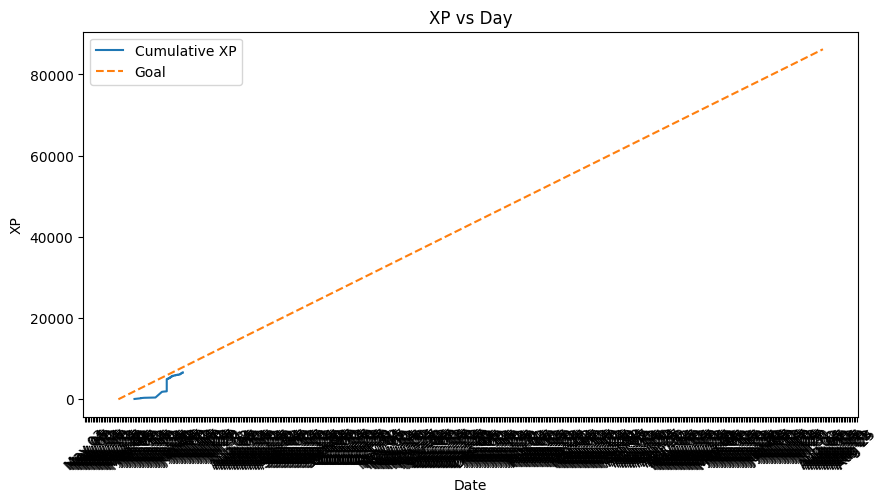

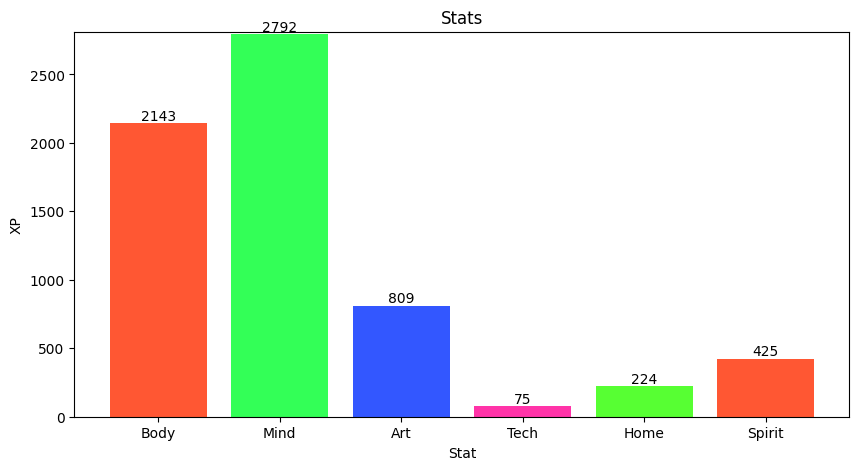

In [1]:
import tkinter as tk
from tkinter import ttk
from tkcalendar import DateEntry
import json
import datetime
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.dates as mdates

class Task:
    def __init__(self, name, category, duration, stat, date=None):
        self.name = name
        self.category = category
        self.duration = duration
        self.stat = stat
        if isinstance(date, str):
            self.date = datetime.datetime.strptime(date, '%Y-%m-%d').date()
        else:
            self.date = date if date else datetime.date.today()

class User:
    def __init__(self):
        self.tasks = []
        self.xp = 0
        self.level = 1
        self.streaks = {}
        self.stats = {'Body': 0, 'Mind': 0, 'Art': 0, 'Tech': 0, 'Home': 0, 'Spirit': 0}

    def add_task(self, task):
        self.tasks.append(task)
        self.recalculate_xp_and_streaks()

    def update_task(self, index, task):
        self.tasks[index] = task
        self.recalculate_xp_and_streaks()

    def delete_task(self, index):
        del self.tasks[index]
        self.recalculate_xp_and_streaks()

    def recalculate_xp_and_streaks(self):
        self.xp = 0
        self.stats = {stat: 0 for stat in self.stats}
        self.streaks = {}

        for task in sorted(self.tasks, key=lambda x: x.date):
            self.calculate_xp(task)

        self.update_level()

    def calculate_xp(self, task):
        streak_bonus = 1
        if task.category in ['typing', 'piano']:
            if task.category not in self.streaks:
                self.streaks[task.category] = [task.date]
            else:
                last_date = self.streaks[task.category][-1]
                if (task.date - last_date).days == 1:
                    streak_len = len(self.streaks[task.category]) + 1
                    streak_bonus = min(streak_len, 3)
                    self.streaks[task.category].append(task.date)
                else:
                    self.streaks[task.category] = [task.date]
        else:
            if task.category not in self.streaks:
                self.streaks[task.category] = []
            self.streaks[task.category].append(task.date)

        xp_gained = task.duration * streak_bonus
        self.xp += xp_gained
        self.stats[task.stat] += xp_gained

    def update_level(self):
        self.level = self.xp // 600 + 1

    def save_to_json(self, filename):
        data = {
            "tasks": [(task.name, task.category, task.duration, task.stat, task.date.isoformat()) for task in self.tasks],
            "xp": self.xp,
            "level": self.level,
            "streaks": {k: [date.isoformat() for date in v] for k, v in self.streaks.items()},
            "stats": self.stats
        }
        with open(filename, 'w') as f:
            json.dump(data, f, indent=4)

    def load_from_json(self, filename):
        with open(filename, 'r') as f:
            data = json.load(f)
            self.tasks = [Task(name, category, duration, stat, date) for name, category, duration, stat, date in data["tasks"]]
            self.xp = data["xp"]
            self.level = data["level"]
            self.streaks = {k: [datetime.datetime.fromisoformat(date).date() for date in v] for k, v in data["streaks"].items()}
            self.stats = data["stats"]
            self.recalculate_xp_and_streaks()

def submit_task():
    date = calendar_var.get_date().strftime('%Y-%m-%d')
    description = description_entry.get()
    category = category_var.get()
    minutes = int(minutes_entry.get())
    stat = stat_var.get()
    task = Task(description, category, minutes, stat, date)
    user.add_task(task)
    user.save_to_json("user_data.json")
    update_user_info()
    update_task_history()
    plot_xp_vs_day()
    plot_stats()

def load_user_data():
    try:
        user.load_from_json("user_data.json")
        update_user_info()
        update_task_history()
        plot_xp_vs_day()
        plot_stats()
    except FileNotFoundError:
        print("No user data found")

def update_user_info():
    xp_label.config(text=f"XP: {user.xp}")
    level_label.config(text=f"Level: {user.level}")
    stats_text = "\n".join([f"{stat}: {value}" for stat, value in user.stats.items()])
    stats_label.config(text=stats_text)

def update_task_history():
    task_listbox.delete(0, tk.END)
    for task in user.tasks:
        task_listbox.insert(tk.END, f"{task.date} - {task.name}, {task.category}, {task.duration} min, {task.stat}")

def plot_xp_vs_day():
    fig, ax = plt.subplots(figsize=(10, 5))

    # Ensure tasks are sorted by date
    sorted_tasks = sorted(user.tasks, key=lambda task: task.date)
    
    dates = [task.date for task in sorted_tasks]
    cumulative_xp = []
    current_xp = 0
    
    for task in sorted_tasks:
        if task.category in ['typing', 'piano']:
            streak_length = len(user.streaks[task.category])
            bonus_multiplier = min(streak_length + 1, 3)
            xp_gain = task.duration * bonus_multiplier
        else:
            xp_gain = task.duration
        
        current_xp += xp_gain
        cumulative_xp.append(current_xp)

    ax.plot(dates, cumulative_xp, label='Cumulative XP')

    # Calculate the goal XP line
    goal_dates = [datetime.date(2024, 5, 24) + datetime.timedelta(days=i) for i in range((datetime.date(2025, 8, 4) - datetime.date(2024, 5, 24)).days + 1)]
    goal_xp = [(i * (14400 / 73)) for i in range(len(goal_dates))]
    ax.plot(goal_dates, goal_xp, label='Goal', linestyle='--')

    ax.set_xlabel('Date')
    ax.set_ylabel('XP')
    ax.set_title('XP vs Day')
    ax.legend()

    # Adjust the x-axis to show days
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    plt.xticks(rotation=45)

    for widget in xp_canvas.winfo_children():
        widget.destroy()
    canvas = FigureCanvasTkAgg(fig, master=xp_canvas)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)



def plot_stats():
    fig, ax = plt.subplots(figsize=(10, 5))
    stats_names = list(user.stats.keys())
    stats_values = list(user.stats.values())
    bars = ax.bar(stats_names, stats_values, color=['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#57FF33', '#FF5733'])

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

    ax.set_xlabel('Stat')
    ax.set_ylabel('XP')
    ax.set_title('Stats')
    ax.set_ylim(0, max(stats_values) + 20)

    for widget in stats_canvas.winfo_children():
        widget.destroy()
    canvas = FigureCanvasTkAgg(fig, master=stats_canvas)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# Create the main window
root = tk.Tk()
root.title("Task Entry")
root.geometry('1920x1080')

# Data Entry Section
entry_frame = ttk.Frame(root)
entry_frame.grid(row=0, column=0, padx=10, pady=10, sticky='n')

# Calendar Date Entry
calendar_label = ttk.Label(entry_frame, text="Select Date:")
calendar_label.grid(row=0, column=0, padx=10, pady=5)
calendar_var = DateEntry(entry_frame, width=12, background='darkblue', foreground='white', borderwidth=2, firstweekday="sunday")
calendar_var.grid(row=0, column=1, padx=10, pady=5)

# Description Text Box
description_label = ttk.Label(entry_frame, text="Enter Description:")
description_label.grid(row=1, column=0, padx=10, pady=5)
description_entry = ttk.Entry(entry_frame, width=40)
description_entry.grid(row=1, column=1, padx=10, pady=5)

# Category Dropdown
category_label = ttk.Label(entry_frame, text="Select Category:")
category_label.grid(row=2, column=0, padx=10, pady=5)
category_var = tk.StringVar()
category_dropdown = ttk.Combobox(entry_frame, textvariable=category_var)
category_dropdown['values'] = ('typing', 'piano', 'other')  # Example categories
category_dropdown.grid(row=2, column=1, padx=10, pady=5)
category_dropdown.current(0)

# Stat Category Dropdown
stat_label = ttk.Label(entry_frame, text="Select Stat:")
stat_label.grid(row=3, column=0, padx=10, pady=5)
stat_var = tk.StringVar()
stat_dropdown = ttk.Combobox(entry_frame, textvariable=stat_var)
stat_dropdown['values'] = ('Body', 'Mind', 'Art', 'Tech', 'Home', 'Spirit')  # Example stats
stat_dropdown.grid(row=3, column=1, padx=10, pady=5)
stat_dropdown.current(0)

# Minutes Entry
minutes_label = ttk.Label(entry_frame, text="Enter Minutes:")
minutes_label.grid(row=4, column=0, padx=10, pady=5)
minutes_entry = ttk.Entry(entry_frame)
minutes_entry.grid(row=4, column=1, padx=10, pady=5)

# Submit Button
submit_button = ttk.Button(entry_frame, text="Submit", command=submit_task)
submit_button.grid(row=5, column=0, columnspan=2, padx=10, pady=10)

# XP and Level Display
xp_label = ttk.Label(entry_frame, text="")
xp_label.grid(row=6, column=0, columnspan=2, padx=10, pady=5)
level_label = ttk.Label(entry_frame, text="")
level_label.grid(row=7, column=0, columnspan=2, padx=10, pady=5)
stats_label = ttk.Label(entry_frame, text="")
stats_label.grid(row=8, column=0, columnspan=2, padx=10, pady=5)

# Task Manager Button
task_manager_button = ttk.Button(entry_frame, text="Manage Tasks")
task_manager_button.grid(row=9, column=0, columnspan=2, padx=10, pady=10)

# Task History Section
history_frame = ttk.Frame(root)
history_frame.grid(row=1, column=0, padx=10, pady=10, sticky='n')

task_listbox = tk.Listbox(history_frame, width=60, height=20)
task_listbox.pack(padx=10, pady=10)

# XP vs Day Plot Section
xp_canvas = ttk.Frame(root, width=1280, height=800)
xp_canvas.grid(row=0, column=1, padx=10, pady=10, sticky='nsew')

# Stats Bar Graph Section
stats_canvas = ttk.Frame(root, width=1280, height=800)
stats_canvas.grid(row=1, column=1, padx=10, pady=10, sticky='nsew')


# Create a User instance
user = User()

# Load User Data
load_user_data()

# Run the application
root.mainloop()
